# SEABORN

1. Distribution plot
2. Catogorial plot

# Distribution plot

These plots are used when we want to visualise data that is in the form of a range such as price, tips, age, time etc.:

1. distplot
2. jointplot
3. pairplot
4. rugplot

In [1]:
pip install seaborn

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## distplot
The distplot shows the distribution of a univariate set of observations, meaning we only wish to visualise one column/one set of data

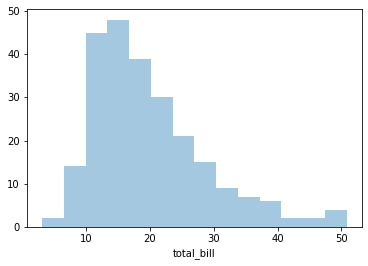

In [7]:
sns.distplot(tips['total_bill'], kde = False)
plt.show()

<AxesSubplot:xlabel='tip', ylabel='Density'>

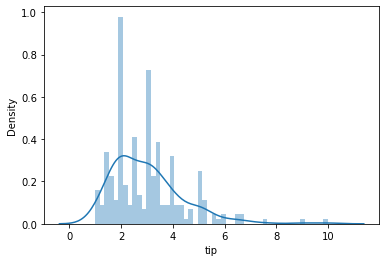

In [8]:
sns.distplot(tips['tip'],bins = 50)

## jointplot
jointplot() allows you to basically match up two distplots for bivariate data meaning we want to see the relation between two different columns. With your choice of what kind parameter to compare with:

“scatter” (Default plot)

“reg” (Regression plot which we will later cover in ML)

“resid”

“kde”

“hex”


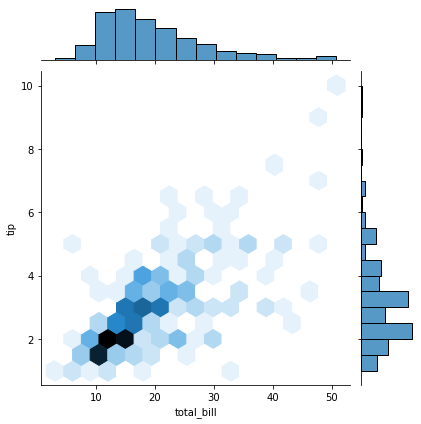

In [17]:
sns.jointplot(x= 'total_bill', y = 'tip', data= tips, kind= 'hex')

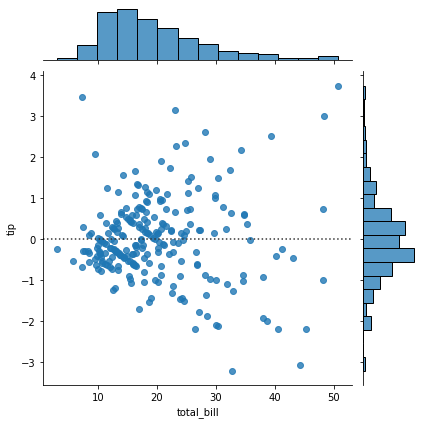

In [18]:
sns.jointplot(x= 'total_bill', y = 'tip', data= tips, kind= 'resid')

## pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). We can plot the relation between all the columns in one go (not recommended if the dataset is large as it will take more time to generate).



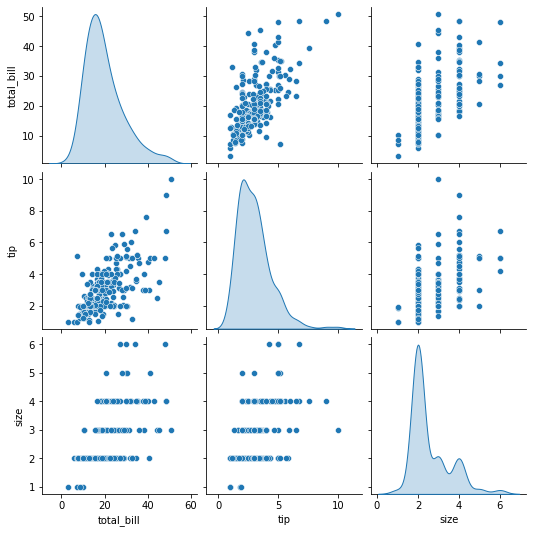

In [21]:
sns.pairplot(tips, diag_kind='kde')

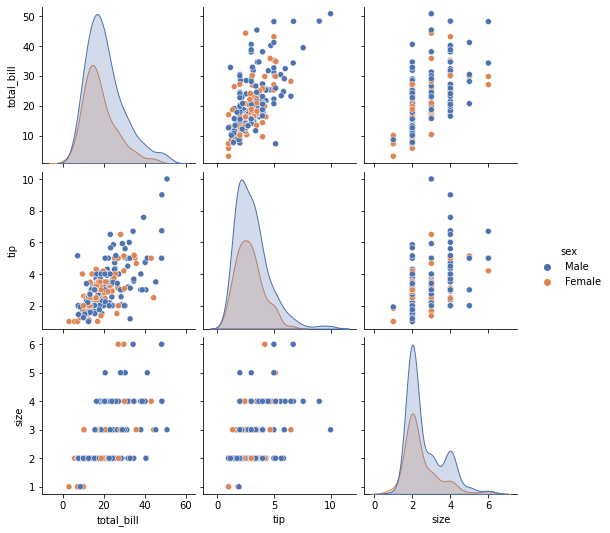

In [24]:
sns.pairplot(tips, hue= 'sex', palette= 'deep')

## Categorical Data Plots
These kind of plots are used when we want to represent data that is fixed like Female and Male values in the sex column, days in the day column, Yes or No in the smoker column etc. There are a few main plot types for this:

factorplot

boxplot

violinplot

stripplot

swarmplot

barplot

countplot (Most commonly used)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

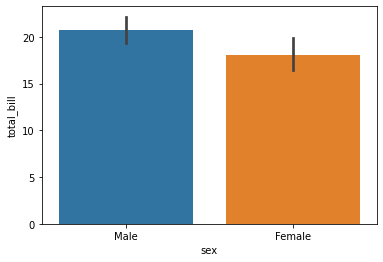

In [25]:
sns.barplot(x= 'sex', y = 'total_bill', data= tips)

## barplot and countplot
These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

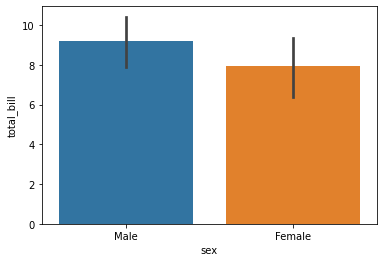

In [26]:
sns.barplot(x = 'sex', y = 'total_bill', data= tips, estimator= np.std)

## countplot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

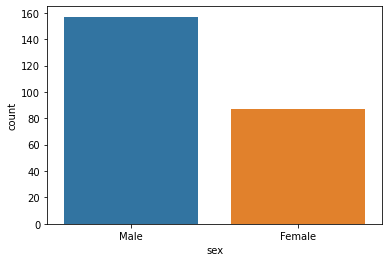

In [27]:
sns.countplot(x = 'sex', data= tips)


## boxplot and violinplot
boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

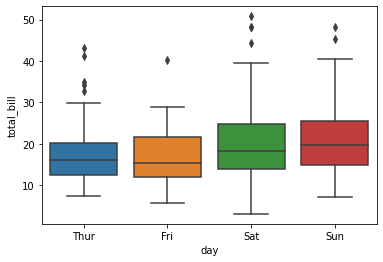

In [28]:
sns.boxplot(x = 'day', y = 'total_bill', data= tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

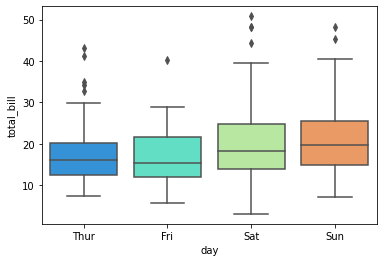

In [32]:
sns.boxplot(x = 'day', y = 'total_bill', data= tips, palette= 'rainbow')

<AxesSubplot:>

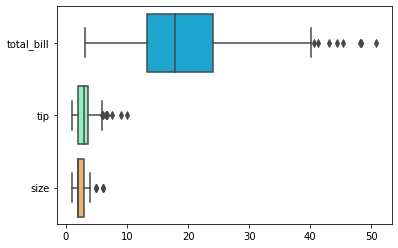

In [35]:
sns.boxplot(data = tips ,  palette= 'rainbow', orient = 'h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

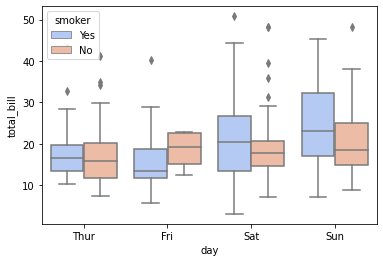

In [36]:
sns.boxplot(x= 'day', y = 'total_bill', hue= 'smoker',data= tips, palette= 'coolwarm')

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

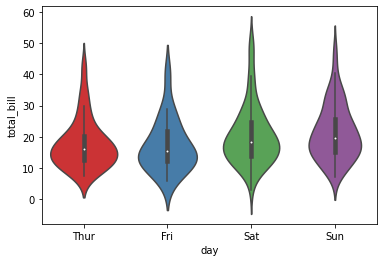

In [40]:
sns.violinplot(x= 'day', y= 'total_bill', data= tips, palette = 'Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

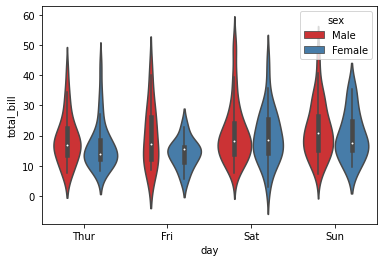

In [42]:
sns.violinplot(x= 'day', y= 'total_bill', data= tips, palette = 'Set1',  hue= 'sex')

In [43]:
#stripplot and swarmplot

# Matrix Plots
Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clustermap:

## Heatmap
In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example

In [44]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

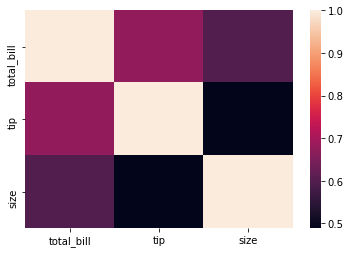

In [46]:
sns.heatmap(tips.corr())

<AxesSubplot:>

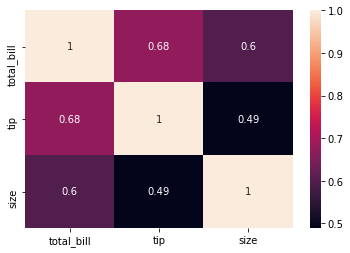

In [47]:
sns.heatmap(tips.corr(), annot = True)